**Machine Learning - 3 - Clustering**

**Ali Fatta Maulana - 1103223228**

In [1]:
# Install gdown if not already installed
!pip install -U -q gdown

In [2]:
# Replace 'your_folder_id' with the actual folder ID
folder_id = '1FsQtOI_QES15zZLmEw099MGAR5-rnsOP'

# Download all files from the specified Google Drive folder
# The `--folder` flag indicates that the ID belongs to a folder
# The `--id` flag is for the folder ID
# The `--output` flag (optional) can specify a directory to save files,
# but by default, it will download to the current directory.
print(f"Downloading files from folder ID: {folder_id}")
!gdown --folder --id {folder_id}

print("Download complete. You can list the files in the current directory to see the downloaded content.")

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Retrieving folder contents
Processing file 1XtaKeD7b-la2R1ygFBNLj16VD1k0MB2Q clusteringmidterm.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1XtaKeD7b-la2R1ygFBNLj16VD1k0MB2Q
To: /content/Machine Learning/clusteringmidterm.csv
100% 1.01M/1.01M [00:00<00:00, 34.0MB/s]
Download completed
Download complete. You can list the files in the current directory to see the downloaded content.


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


In [16]:
df = pd.read_csv("/content/Machine Learning/clusteringmidterm.csv")
display(df.head())

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [17]:
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [18]:
df.shape

(8950, 18)

In [19]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Memeriksa tipe Data

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Memeriksa data dengan nilai kosong (Null value)

In [21]:
df.isna().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


Memeriksa duplikasi data



In [22]:
df.duplicated().sum()

np.int64(0)

Data Pre Processing

In [23]:
print("\n--- [2] Preprocessing: Cleaning & Handling Missing Values ---")

# a. Drop CUST_ID (Tidak berguna untuk clustering)
if 'CUST_ID' in df.columns:
    df_model = df.drop('CUST_ID', axis=1)
else:
    df_model = df.copy()

# b. Handling Missing Values
# Cek kolom yang kosong
missing_cols = df_model.columns[df_model.isnull().any()].tolist()
print(f"Kolom dengan missing values: {missing_cols}")

# Strategi: Isi dengan MEDIAN (lebih robust terhadap outlier dibanding Mean)
for col in missing_cols:
    df_model[col] = df_model[col].fillna(df_model[col].median())
print("Missing values telah diisi dengan median.")


--- [2] Preprocessing: Cleaning & Handling Missing Values ---
Kolom dengan missing values: ['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']
Missing values telah diisi dengan median.


In [24]:
print("\n--- [3] Preprocessing: Handling Outliers & Scaling ---")
# Data keuangan (Balance, Purchases) biasanya sangat 'skewed' (miring).
# Banyak nilai kecil, tapi ada sedikit nilai raksasa (outlier).
# Strategi Terbaik: Log Transformation untuk meredam dampak outlier.
# Kita gunakan log1p (log(1+x)) agar nilai 0 tidak error.

cols_to_transform = df_model.columns # Semua kolom numerik
df_log = df_model.copy()
df_log[cols_to_transform] = np.log1p(df_log[cols_to_transform])

# Scaling (StandardScaler)
# Mengubah data agar mean=0 dan std=1 (Wajib untuk K-Means)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_log)

# Mengubah kembali ke DataFrame agar rapi
df_scaled = pd.DataFrame(df_scaled, columns=df_model.columns)
print("Data telah di-log transform dan di-scaling.")


--- [3] Preprocessing: Handling Outliers & Scaling ---
Data telah di-log transform dan di-scaling.



--- [4] Evaluasi: Menentukan Jumlah Cluster (k) ---


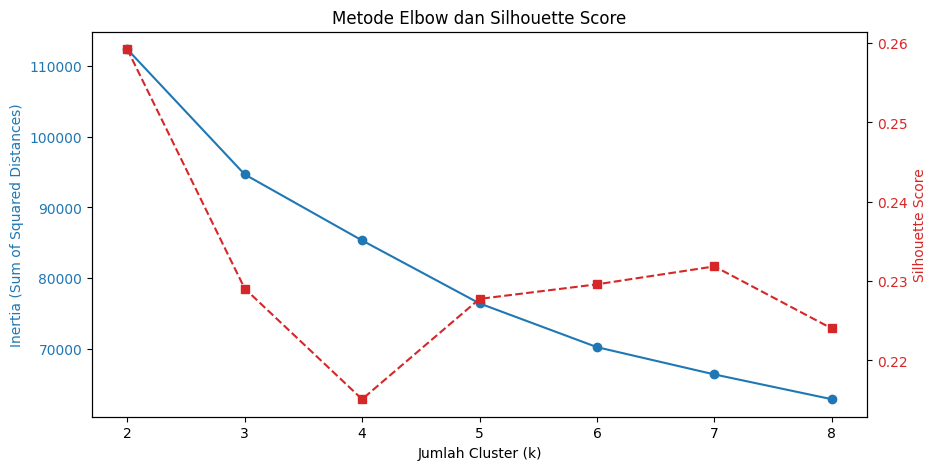

Berdasarkan Silhouette Score, jumlah cluster terbaik adalah: 2


In [25]:
print("\n--- [4] Evaluasi: Menentukan Jumlah Cluster (k) ---")
# Kita coba k dari 2 sampai 8
inertia = []
silhouette_scores = []
k_range = range(2, 9)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

# Visualisasi Elbow Method & Silhouette
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot Inertia (Elbow)
ax1.set_xlabel('Jumlah Cluster (k)')
ax1.set_ylabel('Inertia (Sum of Squared Distances)', color='tab:blue')
ax1.plot(k_range, inertia, 'o-', color='tab:blue', label='Inertia')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Plot Silhouette (Secondary Axis)
ax2 = ax1.twinx()
ax2.set_ylabel('Silhouette Score', color='tab:red')
ax2.plot(k_range, silhouette_scores, 's--', color='tab:red', label='Silhouette')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Metode Elbow dan Silhouette Score')
plt.show()

# PILIHAN OTOMATIS: Kita ambil k dengan silhouette score tertinggi
best_k = k_range[np.argmax(silhouette_scores)]
print(f"Berdasarkan Silhouette Score, jumlah cluster terbaik adalah: {best_k}")

Training Model K-Means

In [26]:
print(f"\n--- [5] Training Model K-Means dengan k={best_k} ---")
kmeans_final = KMeans(n_clusters=best_k, init='k-means++', n_init=10, random_state=42)
clusters = kmeans_final.fit_predict(df_scaled)

# Menempelkan hasil cluster ke Data ASLI (sebelum diskalakan) untuk interpretasi manusia
df['Cluster_Label'] = clusters


--- [5] Training Model K-Means dengan k=2 ---



--- [6] Visualisasi Cluster (Reduksi Dimensi PCA) ---


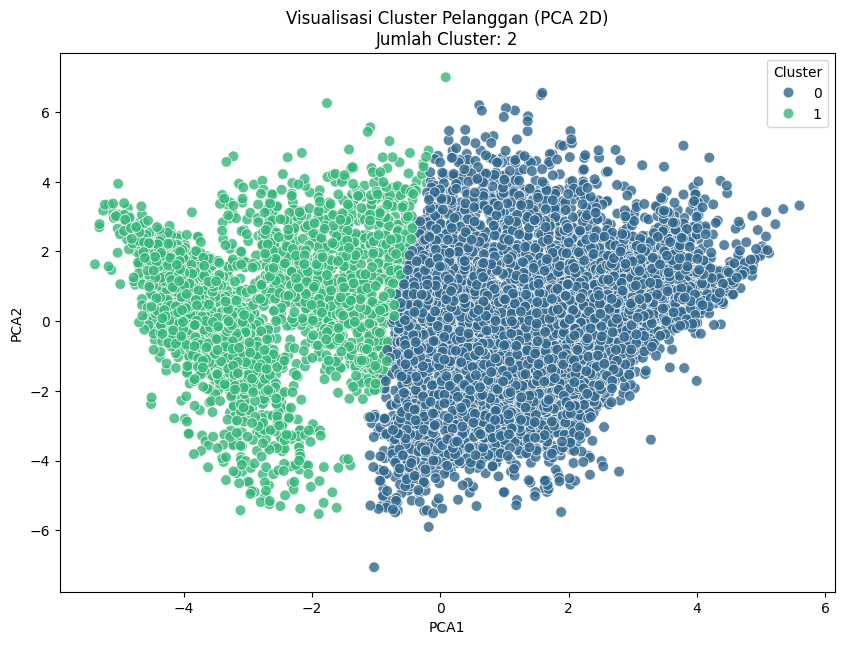

In [27]:
print("\n--- [6] Visualisasi Cluster (Reduksi Dimensi PCA) ---")
# Mengubah 17 dimensi menjadi 2 dimensi agar bisa digambar
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='viridis', s=60, alpha=0.8)
plt.title(f'Visualisasi Cluster Pelanggan (PCA 2D)\nJumlah Cluster: {best_k}')
plt.show()

In [28]:
print("\n--- [7] Interpretasi Cluster (Rata-rata Fitur per Cluster) ---")
# Kita kelompokkan data asli berdasarkan cluster dan hitung rata-ratanya
numeric_cols = df.select_dtypes(include=[np.number]).columns
cluster_summary = df.groupby('Cluster_Label')[numeric_cols].mean()

# Menampilkan statistik penting untuk membedakan cluster
display_cols = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'PRC_FULL_PAYMENT']
print("\nStatistik Kunci (Rata-rata) untuk Setiap Cluster:")
print(cluster_summary[display_cols])

# Analisis Text Sederhana (Contoh untuk 3-4 cluster, sesuaikan dengan hasil run)
print("\n--- PANDUAN MEMBACA HASIL ---")
print("Lihat tabel di atas:")
print("1. Kelompok dengan 'BALANCE' tinggi & 'PURCHASES' rendah -> Kemungkinan pengguna cicilan/cash advance.")
print("2. Kelompok dengan 'PURCHASES' tinggi & 'PRC_FULL_PAYMENT' tinggi -> Pengguna aktif (Transactors).")
print("3. Kelompok dengan semua nilai rendah -> Pengguna pasif/jarang aktif.")


--- [7] Interpretasi Cluster (Rata-rata Fitur per Cluster) ---

Statistik Kunci (Rata-rata) untuk Setiap Cluster:
                   BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT  \
Cluster_Label                                                         
0              1137.514634  1461.423216    349.393106   4590.732098   
1              2367.017123   141.907603   2162.079128   4313.412041   

                  PAYMENTS  PRC_FULL_PAYMENT  
Cluster_Label                                 
0              1707.383997          0.214897  
1              1781.563759          0.038712  

--- PANDUAN MEMBACA HASIL ---
Lihat tabel di atas:
1. Kelompok dengan 'BALANCE' tinggi & 'PURCHASES' rendah -> Kemungkinan pengguna cicilan/cash advance.
2. Kelompok dengan 'PURCHASES' tinggi & 'PRC_FULL_PAYMENT' tinggi -> Pengguna aktif (Transactors).
3. Kelompok dengan semua nilai rendah -> Pengguna pasif/jarang aktif.
